# Data Analysis

In this file, we proceed to develop and test the pipeline that handles our dataset.

Thsi specific file is dedicated to the understanding of the "cancer" dataset provided by the National Cancer Institute, CDG Data Portal.

DATASET was provided by :
https://portal.gdc.cancer.gov/

filter applied were :

- Data Type : Gene Expression Quantification
- Experimental Strategy : RNA-seq
- Access : Open
- Project : TCGA-BRCA


### All the imports for all the things

In [1]:
import os
import sys
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib

import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# to import libs 
sys.path.append('../')
from src.utils import visualisation, benchmark, helpers, monitoring, experiment, search, data_handler

pd.options.display.width = 1000



# just investigating out dataset

loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


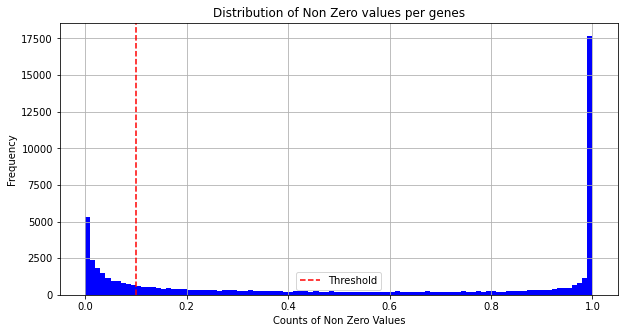

removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 1 , 100 ] ...
min MAD 2.0
treshold: 1
max MAD 188716.0


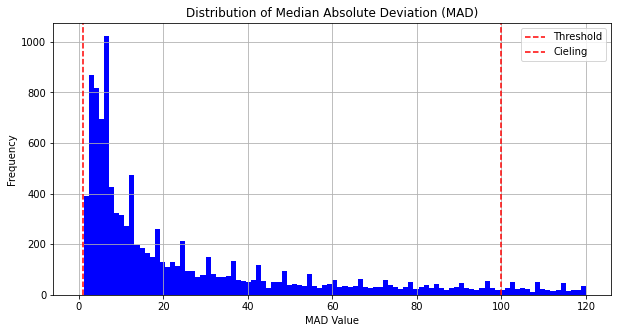

removing 12484 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.002 ...
min LS 0.00012613451432837015
max LS 0.06953009413227346


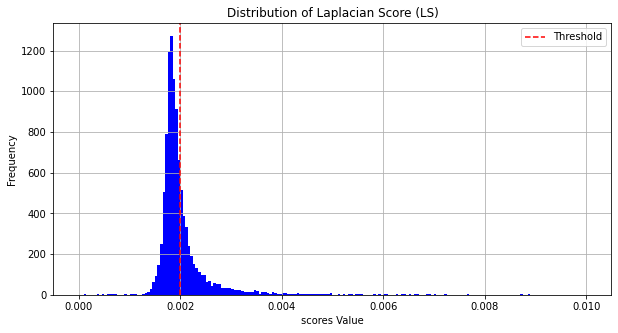

removing 7035 genes under the LS threshold from the dataset
number of genes selected :  3242
matching :  3242
retriving symbols for genes
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 3242)
number of seq in the dataset : 1231


In [2]:
# processed data

data, metadata = data_handler.generate_dataset_BRCA(
    LS_threshold= 0.0020,
    MAD_threshold = 1, 
    MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

In [ ]:
# unprocessed data

data, metadata = data_handler.generate_dataset_BRCA(verbose = 1)

In [3]:

#with open('../workfiles/BRCA_ds.pkl', 'rb') as f:
with open('../workfiles/light_BRCA_ds.pkl', 'rb') as f:
    data, metadata = pickle.load(f)

feature_num = len(metadata["feature_names"])
print(feature_num)
print(len(metadata["subtypes"]))
print(len(metadata["sequence_names"]))

3242
1231
1231


In [17]:
pd.Series(metadata["subtypes"]).value_counts()

LumA      616
LumB      230
Basal     202
Her2       90
Normal     41
Name: count, dtype: int64

In [35]:
sum(pd.Series(metadata["subtypes"]).value_counts()) - len(metadata["sequence_names"])

-52

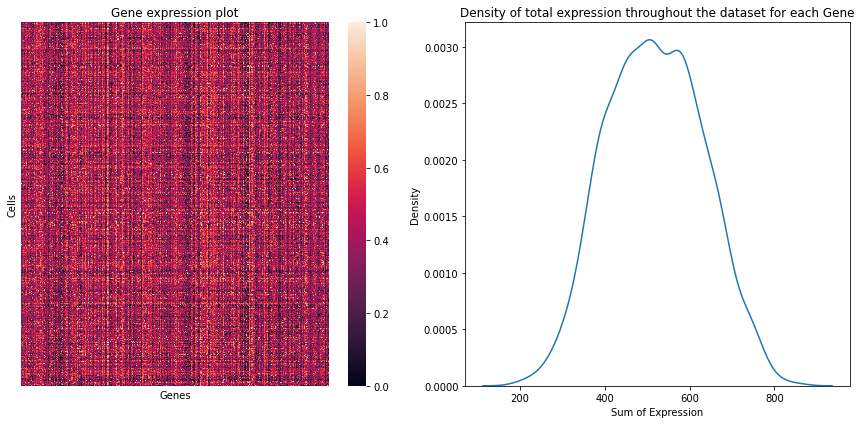

In [18]:
visualisation.dataset_plot(data)

In [3]:
# Convert your NumPy array into a Pandas DataFrame
df = pd.DataFrame(data)

# If you have specific names for your rows and columns, you can assign them as well
# df = pd.DataFrame(data, index=row_names, columns=column_names)

# Assign labels to the DataFrame
df['label'] = metadata["subtypes"]

# It might be necessary to sort the DataFrame based on labels to ensure similar items are grouped together.
# Skip this step if you prefer the clustering algorithm to handle the grouping entirely.
df.sort_values('label', inplace=True)


In [4]:
# Create a color palette that has a distinct color for each label
lut = dict(zip(df['label'].unique(), sns.color_palette("tab10", len(df['label'].unique()))))

# Create a new column of color mappings based on your labels
row_colors = df['label'].map(lut)


In [10]:
# Remove the 'label' column before plotting if it's not part of the similarity measurement
df_data_only = df.drop('label', axis=1)


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


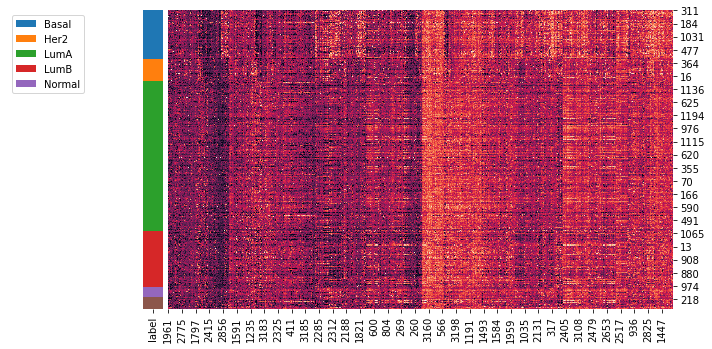

In [12]:
# Create a clustermap and integrate your color-coded labels
clustergrid = sns.clustermap(df_data_only, row_colors=row_colors, method="ward", row_cluster=False, figsize = (10,6))

clustergrid.cax.set_visible(False)
clustergrid.ax_col_dendrogram.set_visible(False)

# Create a legend for the color-coded labels
for label in lut.keys():
    clustergrid.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)

clustergrid.ax_row_dendrogram.legend(loc="upper left", ncol=1)
